Làm sạch dữ liệu và chọn 2 cột .

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datahotel.csv to datahotel.csv


In [ ]:
import pandas as pd
df = pd.read_csv('datahotel.csv',usecols=['adr', 'total_of_special_requests'])
df.dropna()
df.drop_duplicates()
df

,adr,total_of_special_requests
0,0.00,0
1,0.00,0
2,94.95,1
3,63.60,0
4,79.50,0
...,...,...
972,179.38,0
973,166.00,2
974,202.00,2
975,172.00,2


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph()
AD=df['adr']
CC=df['total_of_special_requests']
print("Doanh thu",AD.nunique())
print("Yêu cầu của khách hàng", CC.nunique())
print("Số cạnh", len(df))


Doanh thu 410
Yêu cầu của khách hàng 5
Số cạnh 977


In [ ]:
from networkx.algorithms import bipartite
B = nx.Graph()
for index, row in df.iterrows():
  B.add_edge(row['adr'], row['total_of_special_requests'], weight=1)
B.add_nodes_from(AD, bipartite=0)
B.add_nodes_from(CC, bipartite=1)

<Figure size 3000x3000 with 0 Axes>

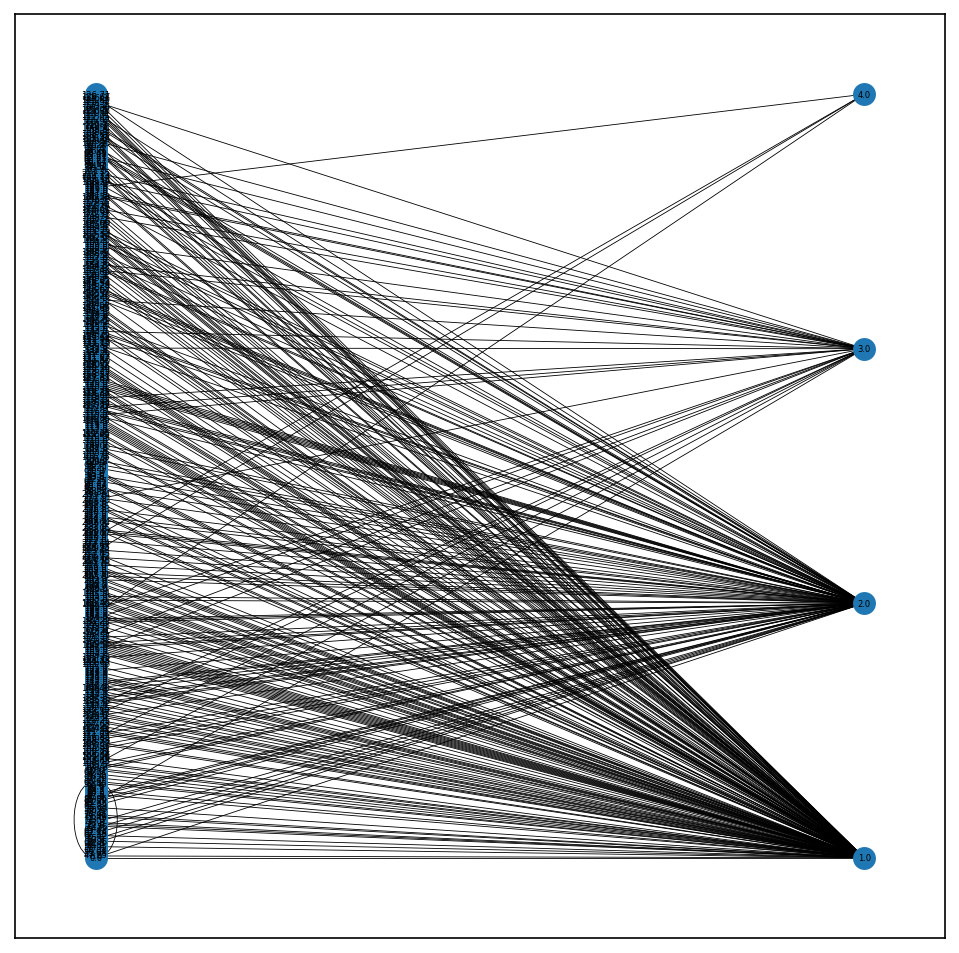

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
pos = nx.spring_layout(B, scale = 40)
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi = 150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, AD), font_size=4, width=0.4, node_size=100)

Đồ thị 1 phía


Code thể hiện đồ thị 1 phía

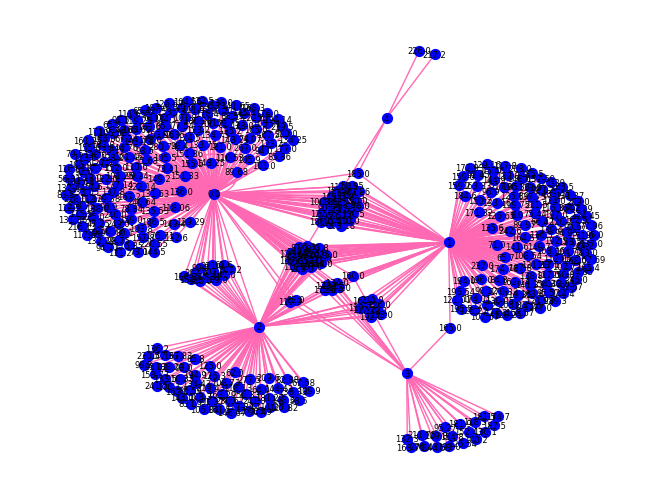

In [ ]:
G = nx.from_pandas_edgelist(df, 'adr', 'total_of_special_requests', create_using=nx.Graph())
nx.draw(G, with_labels=True, node_color='blue' , node_size=50, edge_color='hotpink', font_size=6, width=1.0)
plt.show()

In [ ]:
import networkx as nx

df = pd.read_csv('datahotel.csv',usecols=['adr', 'total_of_special_requests'])

#Tính số cạnh
num_edges = G.number_of_edges()

#Tính số nút
num_nodes = G.number_of_nodes()

#In ra kết quả
print(f"Số cạnh của đồ thị là: {num_edges}")
print(f"Số nút của đồ thị là: {num_nodes}")

Số cạnh của đồ thị là: 530
Số nút của đồ thị là: 414


pagerank

In [ ]:
import networkx as nx
import pandas as pd


# Tính toán PageRank
pagerank = nx.pagerank(G)

# Sắp xếp theo giá trị PageRank giảm dần
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Hiển thị bảng xếp hạng
print("Bảng xếp hạng PageRank:")
print("-----------------------")
print("Player\tPageRank")
print("-----------------------")
for player, rank in sorted_pagerank:
    print(f"{player}\t{rank}")

Bảng xếp hạng PageRank:
-----------------------
Player	PageRank
-----------------------
0.0	0.19481365743759202
1	0.15439226145996446
2	0.08488887578621762
3	0.02442229883691463
4	0.003838534112760847
186.0	0.0033738475116522233
123.0	0.0032995572487138124
172.0	0.0032995572487138124
134.0	0.0032995572487138124
103.5	0.0032995572487138124
173.0	0.0032995572487138124
115.0	0.0032995572487138124
185.0	0.002673016893753516
160.0	0.0025987266308151046
107.0	0.0025578520658091656
87.3	0.0025578520658091656
98.0	0.0025578520658091656
110.7	0.0025578520658091656
153.0	0.0025578520658091656
135.0	0.0025578520658091656
133.0	0.0025578520658091656
97.0	0.0025578520658091656
73.8	0.0025578520658091656
131.0	0.0025578520658091656
96.3	0.0025578520658091656
167.0	0.0025578520658091656
120.6	0.0025578520658091656
146.0	0.0025578520658091656
120.0	0.0025578520658091656
166.0	0.0025578520658091656
169.0	0.0025578520658091656
164.0	0.0025578520658091656
145.0	0.0025578520658091656
154.0	0.0025578520658

In [ ]:
!pip install python-igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.1 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9073 sha256=f5382d3c6f61b48a78d320e1a3e0fc03303c8eed71d5786196e47a6679ce96c7
  Stored in directory: /root/.cache/pip/wheels/49/27/15/dcf90953e3e3322e6f3e447514b20cf39b53c6518cb4a7bace
Successfully built python-igraph


In [ ]:
!pip install python-igraph
!pip install numpy
!pip install pandas
!pip install networkx
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


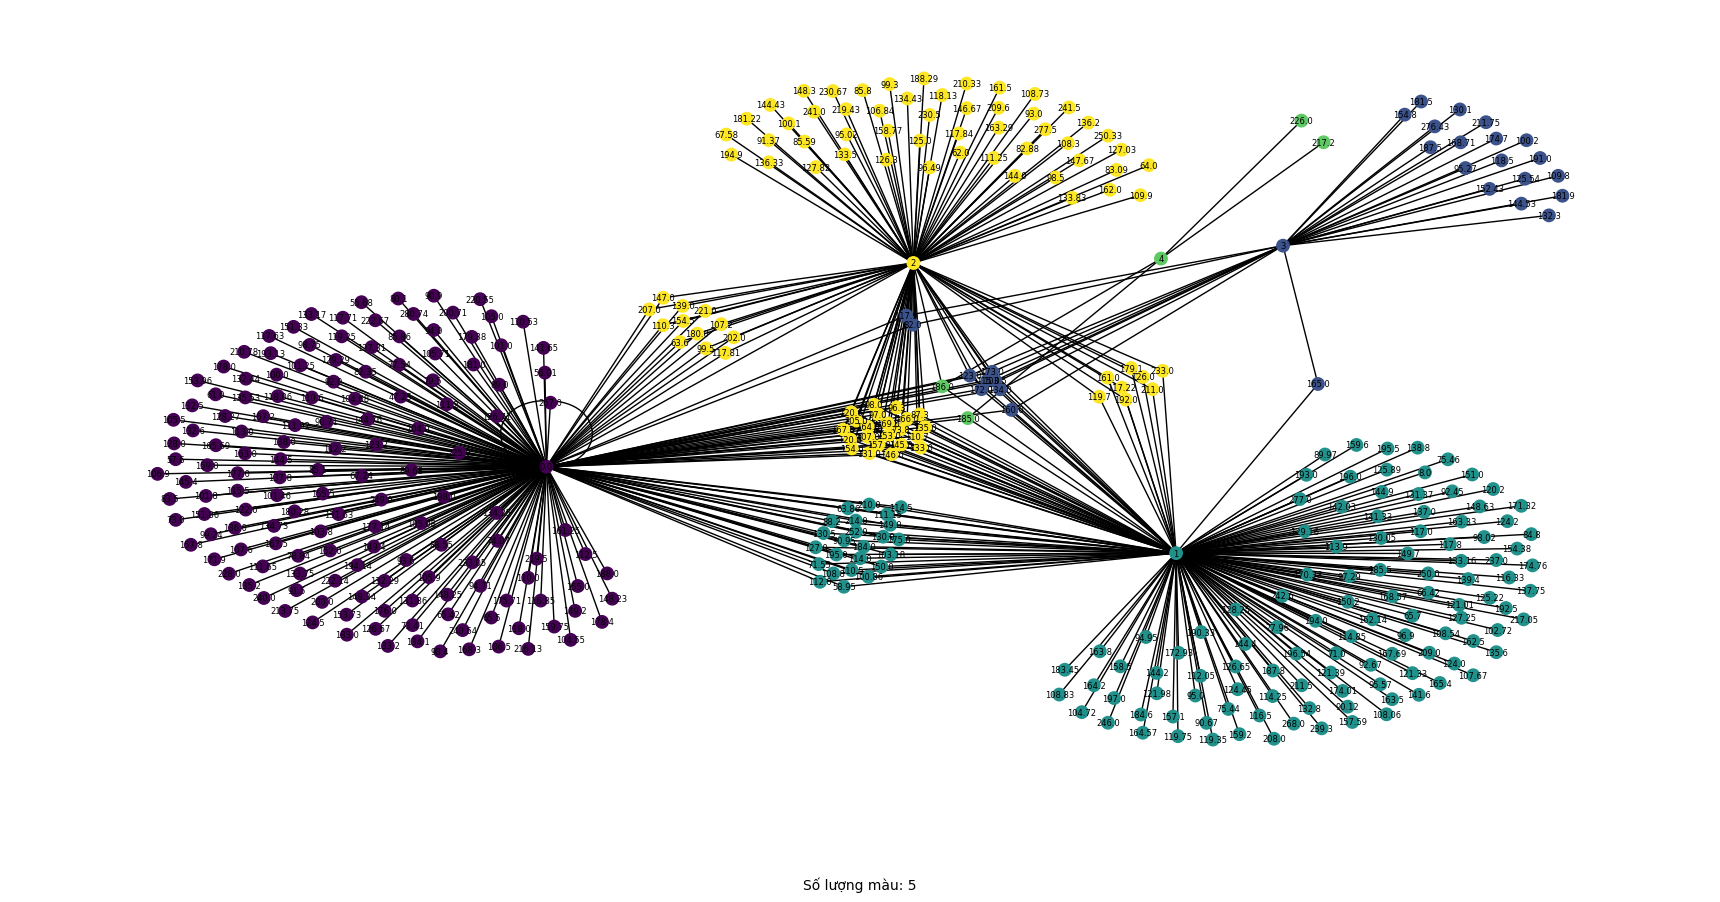

In [ ]:
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

# Tạo đồ thị
G = nx.from_pandas_edgelist(df, 'adr', 'total_of_special_requests', create_using=nx.Graph())

# Chạy thuật toán Louvain
partition = community_louvain.best_partition(G)

# Đếm số lượng màu sắc
num_colors = len(set(partition.values()))

# Vẽ đồ thị với màu sắc tương ứng với cộng đồng
pos = nx.spring_layout(G)
plt.figure(figsize=(17, 8))
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos=pos, node_color=colors, cmap='viridis',node_size=80, with_labels=True, font_size=6, width=1.0)

# Hiển thị số lượng màu
plt.text(0.5, -0.1, f"Số lượng màu: {num_colors}", transform=plt.gca().transAxes, ha="center")

# Hiển thị đồ thị
plt.show()

In [ ]:
import numpy as np
values = list(partition.values())

#kt số lượng cộng đồng
print('số lượng cụm: ', len(np.unique(values)))

số lượng cụm:  5


In [ ]:
import numpy as np

values = list(partition.values())

# Lấy danh sách các giá trị duy nhất trong danh sách
unique_values = np.unique(values)

# In liệt kê tất cả các cụm ra
print("Danh sách các cụm:")
for val in unique_values:
    nodes = [k for k, v in partition.items() if v == val]
    print("Cụm {}: {}".format(val, nodes))


Danh sách các cụm:
Cụm 0: [0.0, 79.5, 94.0, 65.5, 82.35, 56.01, 91.5, 90.9, 122.0, 85.86, 55.68, 134.73, 94.71, 163.0, 67.24, 105.0, 113.0, 85.1, 89.0, 80.1, 101.0, 225.0, 105.5, 98.4, 74.07, 134.1, 117.63, 47.25, 73.0, 93.6, 83.5, 61.0, 89.68, 155.0, 105.08, 65.42, 119.25, 149.4, 152.0, 159.75, 112.2, 110.6, 105.9, 153.96, 126.67, 100.0, 104.68, 213.75, 178.0, 129.29, 132.29, 105.71, 78.84, 90.71, 128.0, 103.8, 175.71, 110.0, 134.25, 101.8, 73.41, 132.44, 106.9, 131.86, 216.13, 98.75, 148.23, 123.2, 198.0, 151.33, 144.5, 155.5, 107.6, 133.75, 92.0, 128.27, 136.0, 168.3, 132.6, 132.5, 249.0, 186.5, 177.0, 153.73, 124.5, 110.53, 117.71, 116.85, 135.2, 111.65, 104.0, 133.17, 240.64, 167.5, 148.34, 111.2, 200.0, 151.86, 178.4, 101.46, 112.5, 222.67, 161.25, 118.0, 240.0, 176.0, 131.63, 233.05, 88.55, 133.2, 167.2, 115.5, 188.0, 141.65, 99.24, 280.74, 137.8, 126.71, 219.5, 111.92, 57.6, 157.8, 118.06, 177.14, 222.14, 194.14, 193.13, 210.78, 135.53, 180.28, 159.0, 104.55, 144.76, 220.55, 77

In [ ]:
for i in range(len(np.unique(values))):
  print("cụm:",i)
  for name, k in partition.items():
    if k == i:
      print(name, end=" ")
  print("")

cụm: 0
0.0 79.5 94.0 65.5 82.35 56.01 91.5 90.9 122.0 85.86 55.68 134.73 94.71 163.0 67.24 105.0 113.0 85.1 89.0 80.1 101.0 225.0 105.5 98.4 74.07 134.1 117.63 47.25 73.0 93.6 83.5 61.0 89.68 155.0 105.08 65.42 119.25 149.4 152.0 159.75 112.2 110.6 105.9 153.96 126.67 100.0 104.68 213.75 178.0 129.29 132.29 105.71 78.84 90.71 128.0 103.8 175.71 110.0 134.25 101.8 73.41 132.44 106.9 131.86 216.13 98.75 148.23 123.2 198.0 151.33 144.5 155.5 107.6 133.75 92.0 128.27 136.0 168.3 132.6 132.5 249.0 186.5 177.0 153.73 124.5 110.53 117.71 116.85 135.2 111.65 104.0 133.17 240.64 167.5 148.34 111.2 200.0 151.86 178.4 101.46 112.5 222.67 161.25 118.0 240.0 176.0 131.63 233.05 88.55 133.2 167.2 115.5 188.0 141.65 99.24 280.74 137.8 126.71 219.5 111.92 57.6 157.8 118.06 177.14 222.14 194.14 193.13 210.78 135.53 180.28 159.0 104.55 144.76 220.55 77.54 171.9 148.25 183.0 149.2 267.0 181.0 200.71 228.0 138.0 165.69 127.31 145.4 101.25 179.38 
cụm: 1
123.0 117.9 82.0 172.0 109.8 3 130.1 165.0 125.54 95

Girvan Newman

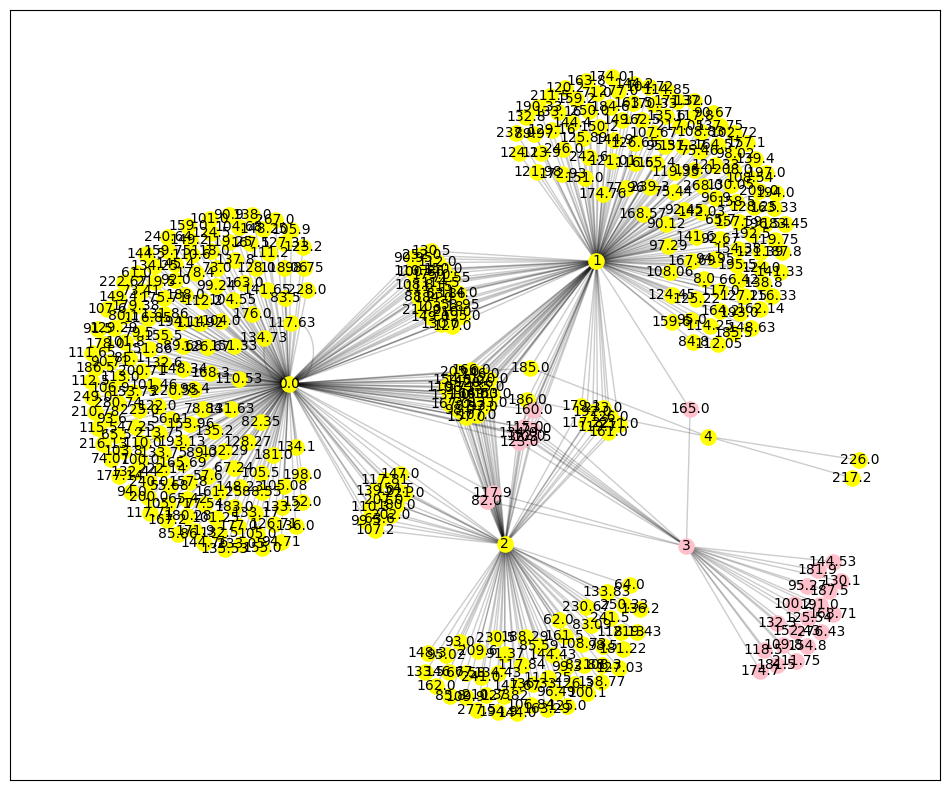

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman (G)
K=3
for i in range(k-1):
    comms = next(comp)

colors = ['yellow', 'pink']
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
for nodes, c in zip(comms, colors):
     nx.draw_networkx_nodes (G, pos, nodelist=nodes, node_color=[c], node_size=120)
nx.draw_networkx_edges (G, pos, alpha=0.2)
nx.draw_networkx_labels (G, pos, font_size=10)
plt.show()

eigenvector

In [ ]:
import pandas as pd
import operator

eigenvector_centrality = nx.eigenvector_centrality(G, weight="weight")

data = {
'total_of_special_requests': eigenvector_centrality.keys(),
'Eigenvector centrality': eigenvector_centrality.values()
}
eigenvector_centrality_table = pd.DataFrame.from_dict(data)
eigenvector_centrality_table = eigenvector_centrality_table.sort_values(
 	by=['Eigenvector centrality', 'total_of_special_requests'],
ascending=False)

eigenvector_centrality_table.head (15)

,total_of_special_requests,Eigenvector centrality
0,0.0,0.571537
2,1.0,0.381032
6,2.0,0.237141
244,173.0,0.069761
60,172.0,0.069761
186,134.0,0.069761
17,123.0,0.069761
251,115.0,0.069761
210,103.5,0.069761
327,186.0,0.068115


closeness


In [ ]:
import pandas as pd
import networkx as nx

# Chuyển dataframe sang đồ thị
G = nx.from_pandas_edgelist(df, source='adr', target='total_of_special_requests', edge_attr=True)

# Tính closeness centrality của tất cả các đỉnh
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Sắp xếp closeness centrality theo thứ tự giảm dần
closeness_dict = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))

# In kết quả closeness centrality của từng đỉnh
for node, closeness in closeness_dict.items():
    print(f"{node}: {closeness}")


0.0: 0.6586921850079744
1: 0.5736111111111111
123.0: 0.49939540507859737
172.0: 0.49939540507859737
134.0: 0.49939540507859737
103.5: 0.49939540507859737
173.0: 0.49939540507859737
115.0: 0.49939540507859737
2: 0.4824766355140187
186.0: 0.4807916181606519
107.0: 0.4774566473988439
87.3: 0.4774566473988439
98.0: 0.4774566473988439
110.7: 0.4774566473988439
153.0: 0.4774566473988439
135.0: 0.4774566473988439
133.0: 0.4774566473988439
97.0: 0.4774566473988439
73.8: 0.4774566473988439
131.0: 0.4774566473988439
96.3: 0.4774566473988439
167.0: 0.4774566473988439
120.6: 0.4774566473988439
146.0: 0.4774566473988439
120.0: 0.4774566473988439
166.0: 0.4774566473988439
169.0: 0.4774566473988439
164.0: 0.4774566473988439
145.0: 0.4774566473988439
154.0: 0.4774566473988439
157.0: 0.4774566473988439
205.0: 0.4774566473988439
160.0: 0.46985210466439137
185.0: 0.45334796926454446
63.86: 0.45038167938931295
108.8: 0.45038167938931295
58.95: 0.45038167938931295
88.2: 0.45038167938931295
110.5: 0.4503816

betweeness

In [ ]:

# Tạo đồ thị
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['adr'])
    G.add_node(row['total_of_special_requests'])
    G.add_edge(row['adr'], row['total_of_special_requests'])
# Chạy thuật toán betweenness centrality trên đồ thị G
betweenness_centrality = nx.betweenness_centrality(G, normalized=False)

# Sắp xếp betweenness centrality theo thứ tự giảm dần
betweenness_dict = dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))

# In kết quả betweenness centrality của từng đỉnh
for node, betweenness in betweenness_dict.items():
    print(f"{node}: {betweenness}")


0.0: 56873.11990382341
1: 44419.61990382357
2: 21673.92685901946
3: 7417.083333333334
82.0: 915.6021502854051
123.0: 915.6021502854051
97.0: 915.6021502854051
172.0: 915.6021502854051
134.0: 915.6021502854051
103.5: 915.6021502854051
173.0: 915.6021502854051
115.0: 915.6021502854051
186.0: 883.5180272108848
4: 837.3333333333336
160.0: 612.0806474313852
185.0: 521.5653061224489
117.9: 487.72849323637394
165.0: 270.79032371569235
98.0: 157.08333333333331
107.0: 157.08333333333331
145.0: 157.08333333333331
153.0: 157.08333333333331
87.3: 157.08333333333331
110.7: 157.08333333333331
135.0: 157.08333333333331
133.0: 157.08333333333331
73.8: 157.08333333333331
131.0: 157.08333333333331
96.3: 157.08333333333331
167.0: 157.08333333333331
120.6: 157.08333333333331
146.0: 157.08333333333331
120.0: 157.08333333333331
161.0: 157.08333333333331
166.0: 157.08333333333331
169.0: 157.08333333333331
117.22: 157.08333333333331
126.0: 157.08333333333331
119.7: 157.08333333333331
164.0: 157.08333333333331

eigenvalue


In [ ]:

# Tính toán eigenvalue centrality
eigenvalue_centrality = nx.eigenvector_centrality_numpy(G)

# Sắp xếp kết quả theo thứ tự giảm dần
sorted_values = sorted(eigenvalue_centrality.items(), key=lambda x: x[1], reverse=True)

# In kết quả
for node, value in sorted_values:
    print(f"{node}: {value}")


0.0: 0.5715310019031117
1: 0.381026798086837
2: 0.23713859209658503
103.5: 0.06976152580790525
115.0: 0.06976152580790525
123.0: 0.06976152580790522
134.0: 0.06976152580790522
172.0: 0.0697615258079052
173.0: 0.06976152580790519
186.0: 0.06811573297843385
135.0: 0.06771551930861662
166.0: 0.06771551930861662
87.3: 0.0677155193086166
153.0: 0.0677155193086166
131.0: 0.0677155193086166
146.0: 0.0677155193086166
169.0: 0.0677155193086166
157.0: 0.0677155193086166
98.0: 0.06771551930861659
110.7: 0.06771551930861659
97.0: 0.06771551930861659
73.8: 0.06771551930861659
167.0: 0.06771551930861659
120.6: 0.06771551930861659
164.0: 0.06771551930861659
107.0: 0.06771551930861658
133.0: 0.06771551930861658
96.3: 0.06771551930861658
145.0: 0.06771551930861658
154.0: 0.06771551930861658
205.0: 0.06771551930861658
120.0: 0.06771551930861656
160.0: 0.05626399566597427
185.0: 0.05461820283650286
114.5: 0.054217989166685666
111.15: 0.054217989166685666
252.0: 0.054217989166685666
114.0: 0.0542179891666